# Fashion Retail Sales Analysis with Visualizations

This Python script downloads a fashion retail sales dataset from Kaggle, prepares the data by converting date and review rating fields, and generates various visualizations. It includes a breakdown of top-selling items, purchase amount distribution, review ratings, payment method preferences, monthly sales trends, and weekday sales patterns. Additionally, it provides insights into the relationship between purchase amounts and review ratings, as well as popular payment methods for the top-selling items. The visualizations are created using Matplotlib and Seaborn for clear and informative data presentation.

Dataset downloaded to: /kaggle/input/fashion-retail-sales


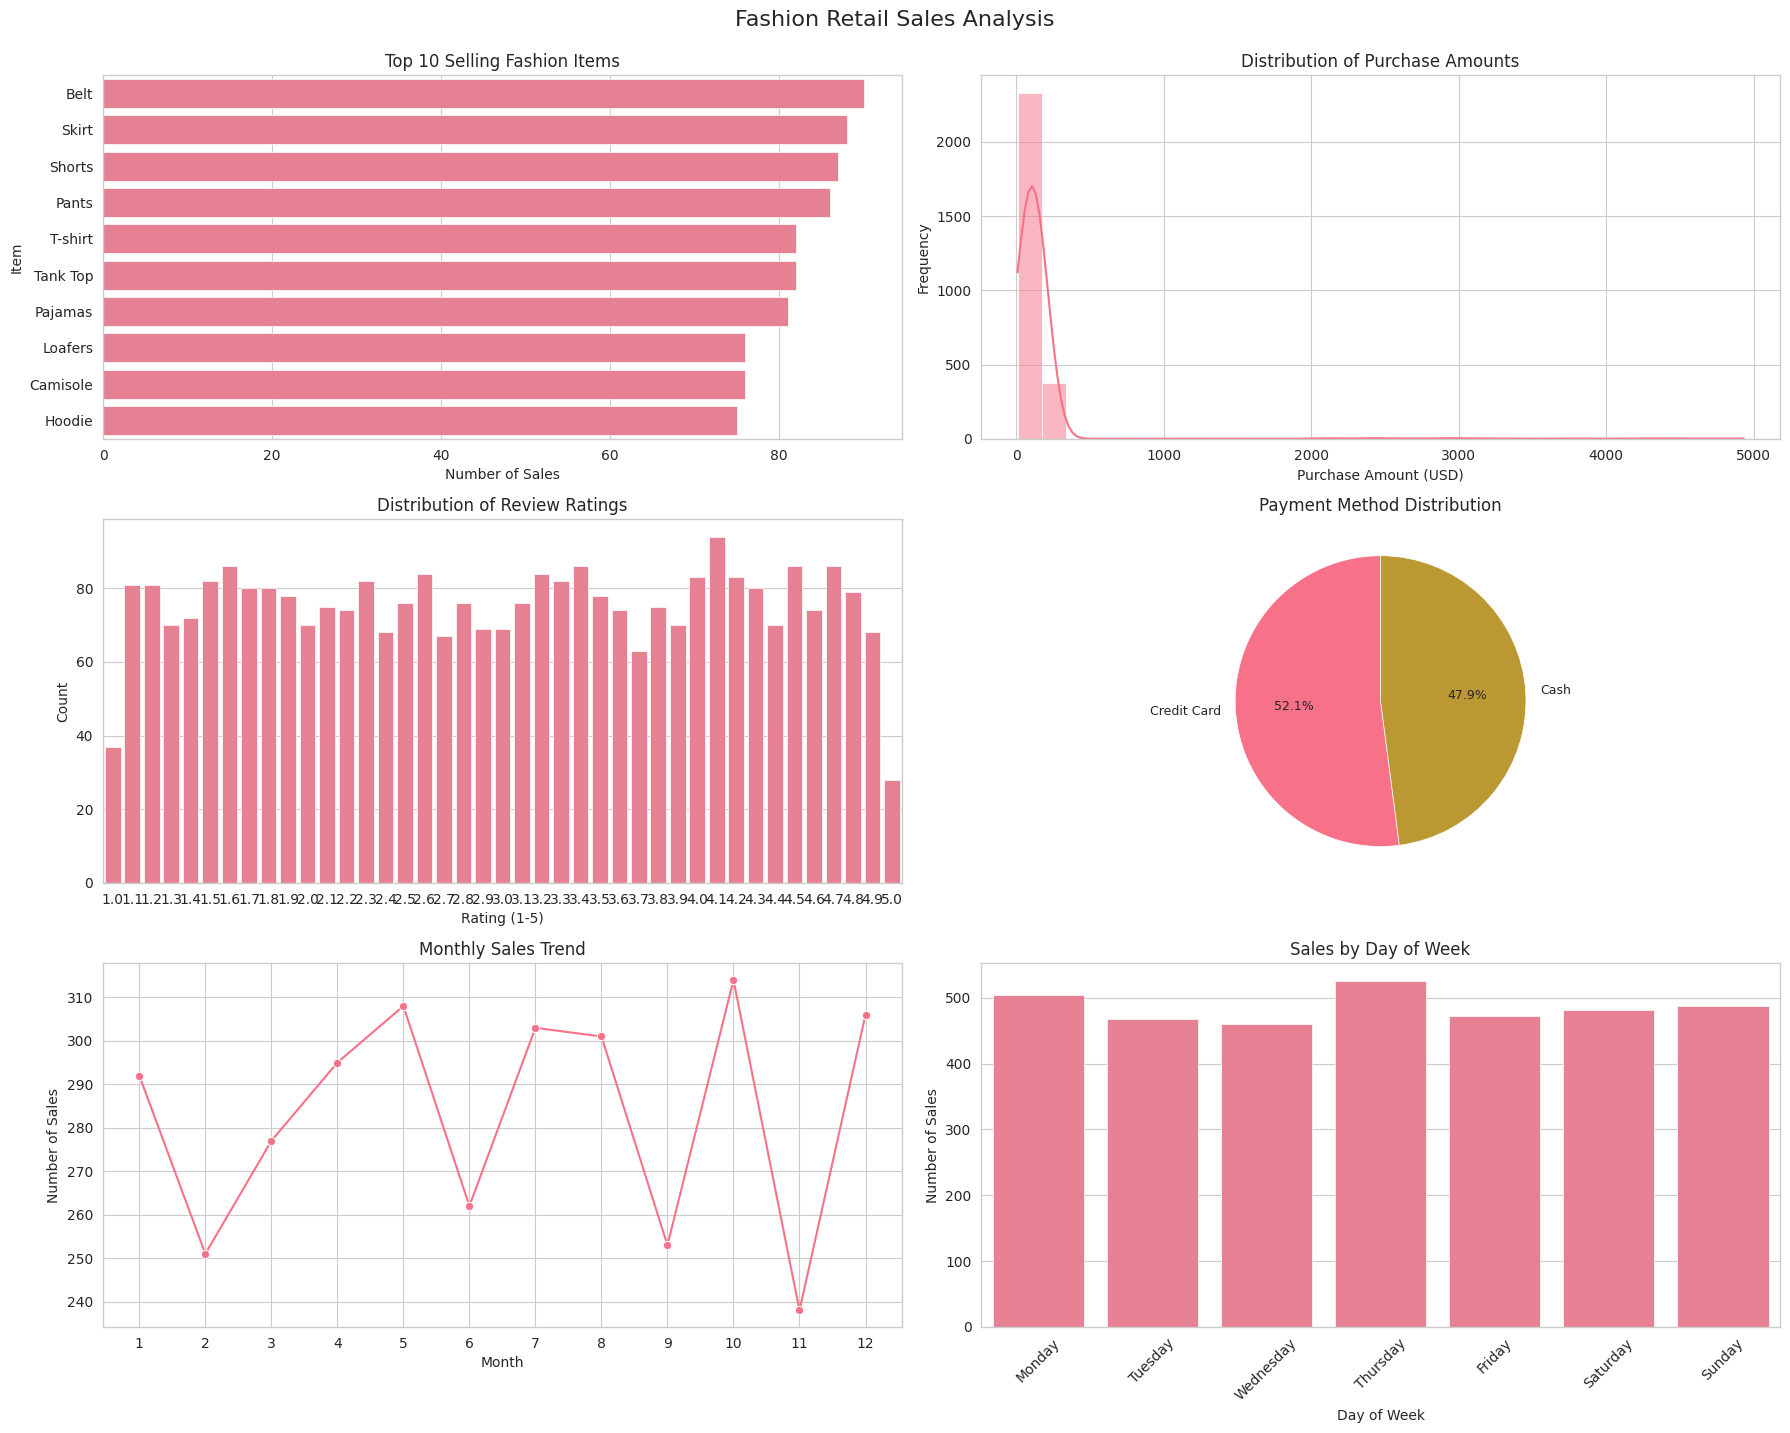

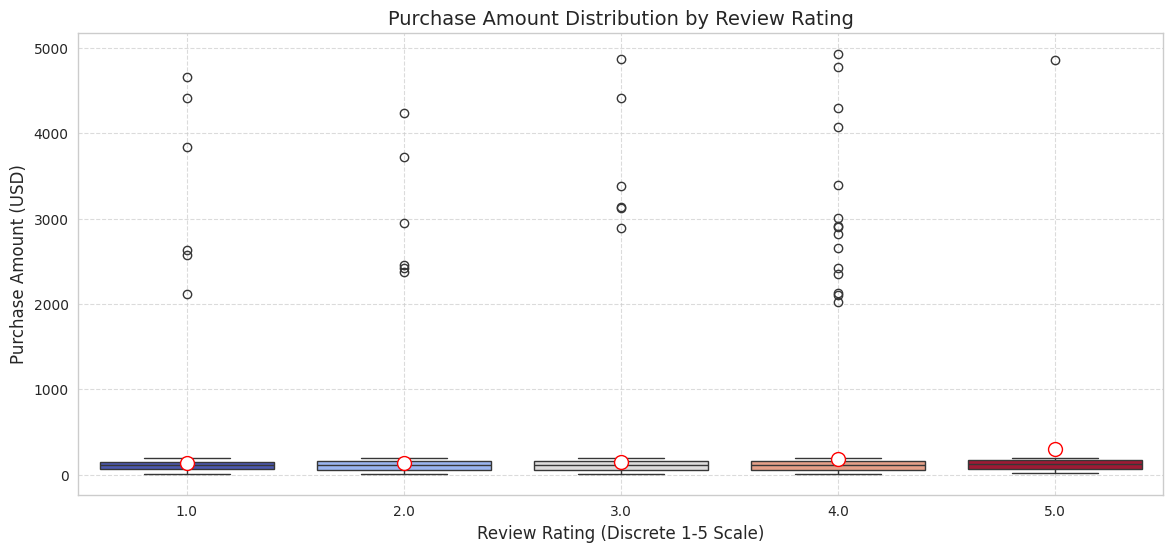

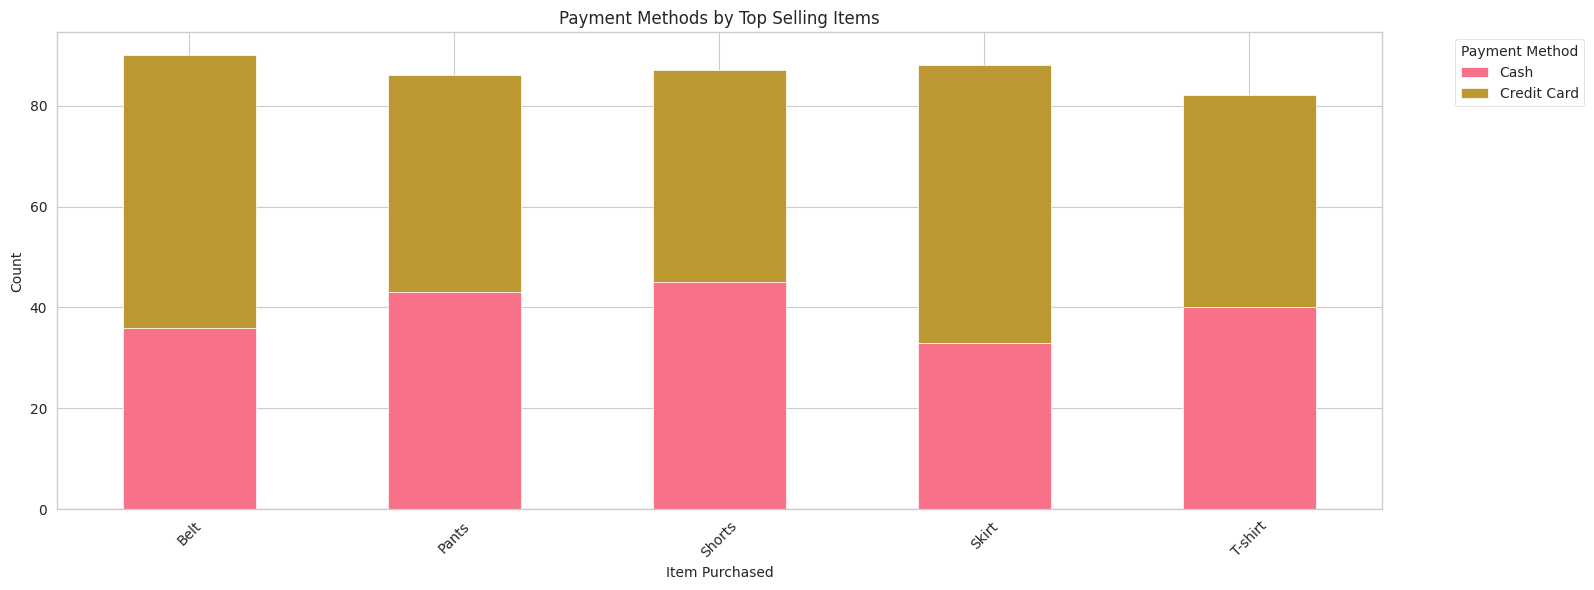

In [6]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up visualization style
plt.style.use('ggplot')
sns.set_style("whitegrid")
sns.set_palette("husl")

def load_and_prepare_data():
    """Download dataset from Kaggle Hub and prepare it for analysis"""
    try:
        # Download the dataset
        path = kagglehub.dataset_download("atharvasoundankar/fashion-retail-sales")
        print(f"Dataset downloaded to: {path}")

        # Find the CSV file in the downloaded directory
        csv_file = next(Path(path).glob('*.csv'))
        df = pd.read_csv(csv_file)

        # Data preparation
        df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], format='%d-%m-%Y')
        df['Month'] = df['Date Purchase'].dt.month
        df['DayOfWeek'] = df['Date Purchase'].dt.day_name()
        df['Year'] = df['Date Purchase'].dt.year

        return df

    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def create_visualizations(df):
    """Create comprehensive visualizations of the fashion retail sales data"""
    if df is None:
        return

    # Create a figure with multiple visualizations
    plt.figure(figsize=(18, 14))

    # 1. Top Selling Items
    plt.subplot(3, 2, 1)
    top_items = df['Item Purchased'].value_counts().head(10)
    sns.barplot(x=top_items.values, y=top_items.index)
    plt.title('Top 10 Selling Fashion Items', fontsize=12)
    plt.xlabel('Number of Sales', fontsize=10)
    plt.ylabel('Item', fontsize=10)

    # 2. Purchase Amount Distribution
    plt.subplot(3, 2, 2)
    sns.histplot(df['Purchase Amount (USD)'].dropna(), bins=30, kde=True)
    plt.title('Distribution of Purchase Amounts', fontsize=12)
    plt.xlabel('Purchase Amount (USD)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

    # 3. Review Ratings Distribution
    plt.subplot(3, 2, 3)
    sns.countplot(x='Review Rating', data=df.dropna(subset=['Review Rating']))
    plt.title('Distribution of Review Ratings', fontsize=12)
    plt.xlabel('Rating (1-5)', fontsize=10)
    plt.ylabel('Count', fontsize=10)

    # 4. Payment Method Preferences
    plt.subplot(3, 2, 4)
    payment_counts = df['Payment Method'].value_counts()
    plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',
            startangle=90, textprops={'fontsize': 9})
    plt.title('Payment Method Distribution', fontsize=12)

    # 5. Monthly Sales Trend
    plt.subplot(3, 2, 5)
    monthly_sales = df.groupby('Month').size()
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
    plt.title('Monthly Sales Trend', fontsize=12)
    plt.xlabel('Month', fontsize=10)
    plt.ylabel('Number of Sales', fontsize=10)
    plt.xticks(range(1, 13))

    # 6. Weekday Sales Pattern
    plt.subplot(3, 2, 6)
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_sales = df['DayOfWeek'].value_counts().loc[weekday_order]
    sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
    plt.title('Sales by Day of Week', fontsize=12)
    plt.xlabel('Day of Week', fontsize=10)
    plt.ylabel('Number of Sales', fontsize=10)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.suptitle('Fashion Retail Sales Analysis', y=1.02, fontsize=16)
    plt.show()

    # Enhanced Purchase Amount by Review Rating visualization
    plt.figure(figsize=(14, 6))

    # Create a clean dataframe for ratings visualization
    rating_df = df.dropna(subset=['Review Rating', 'Purchase Amount (USD)']).copy()
    rating_df.loc[:, 'Review Rating'] = rating_df['Review Rating'].astype(int)

    # Create a boxplot with the hue parameter set to 'Review Rating'
    ax = sns.boxplot(x='Review Rating', y='Purchase Amount (USD)',
                     data=rating_df, hue='Review Rating', palette='coolwarm',
                     showmeans=True, legend=False,
                     meanprops={"marker":"o", "markerfacecolor":"white",
                                 "markeredgecolor":"red", "markersize":10})

    plt.title('Purchase Amount Distribution by Review Rating', fontsize=14)
    plt.xlabel('Review Rating (Discrete 1-5 Scale)', fontsize=12)
    plt.ylabel('Purchase Amount (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Payment Methods by Item visualization
    plt.figure(figsize=(16, 6))
    top_5_items = df['Item Purchased'].value_counts().head(5).index
    filtered_df = df[df['Item Purchased'].isin(top_5_items)].copy()
    cross_tab = pd.crosstab(filtered_df['Item Purchased'], filtered_df['Payment Method'])
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Payment Methods by Top Selling Items', fontsize=12)
    plt.xlabel('Item Purchased', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45)
    plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load and prepare the data
    df = load_and_prepare_data()

    # Create visualizations if data loaded successfully
    if df is not None:
        create_visualizations(df)
    else:
        print("Could not load data. Please check your Kaggle Hub credentials and try again.")